In [1]:
import pandas as pd
import numpy as np

In [2]:
data1  = pd.read_csv('Train_df_15-17.csv')  
data2  = pd.read_csv('Train_df_18-20.csv')

In [3]:
data1.head(10)

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol
0,0.0,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,02-10-2015 9:00,2015-10-02,7639.32
1,0.0,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,02-10-2015 10:00,2015-10-02,6300.32
2,0.0,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02-10-2015 11:00,2015-10-02,6621.42
3,0.0,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02-10-2015 12:00,2015-10-02,6958.12
4,0.0,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02-10-2015 13:00,2015-10-02,6824.22
5,0.0,292.72,0.0,0.0,1,Clear skies,Clear skies,02-10-2015 14:00,2015-10-02,7164.82
6,0.0,293.37,0.0,0.0,1,Clear skies,Clear skies,02-10-2015 15:00,2015-10-02,7680.92
7,0.0,294.16,0.0,0.0,1,Clear skies,Clear skies,02-10-2015 16:00,2015-10-02,8250.32
8,0.0,294.84,0.0,0.0,20,Cloudy skies,Scattered clouds,02-10-2015 17:00,2015-10-02,7952.62
9,0.0,293.70,0.0,0.0,20,Cloudy skies,Scattered clouds,02-10-2015 18:00,2015-10-02,6622.72


In [6]:
data1.drop('Rainfall_last_hour', axis=1, inplace=True)

In [7]:
data1.head(10)

,Holiday,Temperature,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol
0,0.0,289.28,0.0,40,Cloudy skies,Partly cloudy skies,02-10-2015 9:00,2015-10-02,7639.32
1,0.0,290.26,0.0,75,Cloudy skies,Fragmented clouds,02-10-2015 10:00,2015-10-02,6300.32
2,0.0,290.28,0.0,90,Cloudy skies,Full cloud cover,02-10-2015 11:00,2015-10-02,6621.42
3,0.0,290.33,0.0,90,Cloudy skies,Full cloud cover,02-10-2015 12:00,2015-10-02,6958.12
4,0.0,292.14,0.0,75,Cloudy skies,Fragmented clouds,02-10-2015 13:00,2015-10-02,6824.22
5,0.0,292.72,0.0,1,Clear skies,Clear skies,02-10-2015 14:00,2015-10-02,7164.82
6,0.0,293.37,0.0,1,Clear skies,Clear skies,02-10-2015 15:00,2015-10-02,7680.92
7,0.0,294.16,0.0,1,Clear skies,Clear skies,02-10-2015 16:00,2015-10-02,8250.32
8,0.0,294.84,0.0,20,Cloudy skies,Scattered clouds,02-10-2015 17:00,2015-10-02,7952.62
9,0.0,293.70,0.0,20,Cloudy skies,Scattered clouds,02-10-2015 18:00,2015-10-02,6622.72


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [9]:
# Let's check for missing values first
print("Missing values in each column:")
print(data1.isnull().sum())

# Basic data exploration
print("\nData types:")
print(data1.dtypes)

Missing values in each column:
Holiday               0
Temperature           0
Snowfall_last_hour    0
Cloud_Cover           0
Weather               0
Weather_Desc          0
TimeStamp             0
Date                  0
Traffic_Vol           0
dtype: int64

Data types:
Holiday               float64
Temperature           float64
Snowfall_last_hour    float64
Cloud_Cover             int64
Weather                object
Weather_Desc           object
TimeStamp              object
Date                   object
Traffic_Vol           float64
dtype: object


In [11]:
# Data preprocessing
# Convert timestamp to datetime format
data1['TimeStamp'] = pd.to_datetime(data1['TimeStamp'], format='%d-%m-%Y %H:%M')
data1['Date'] = pd.to_datetime(data1['Date'])

# Extract time-based features
data1['Hour'] = data1['TimeStamp'].dt.hour
data1['DayOfWeek'] = data1['TimeStamp'].dt.dayofweek
data1['Month'] = data1['TimeStamp'].dt.month
data1['Year'] = data1['TimeStamp'].dt.year

# Create cyclical features for time variables (to capture periodicity)
data1['Hour_sin'] = np.sin(2 * np.pi * data1['Hour']/24)
data1['Hour_cos'] = np.cos(2 * np.pi * data1['Hour']/24)
data1['DayOfWeek_sin'] = np.sin(2 * np.pi * data1['DayOfWeek']/7)
data1['DayOfWeek_cos'] = np.cos(2 * np.pi * data1['DayOfWeek']/7)
data1['Month_sin'] = np.sin(2 * np.pi * data1['Month']/12)
data1['Month_cos'] = np.cos(2 * np.pi * data1['Month']/12)

# Handle categorical variables - FIXED VERSION
# One-hot encode the Weather column
weather_encoder = OneHotEncoder(sparse_output=False, drop='first')
weather_encoded = weather_encoder.fit_transform(data1[['Weather']])
weather_encoded_df = pd.DataFrame(
    weather_encoded, 
    columns=[f'Weather_{cat}' for cat in weather_encoder.categories_[0][1:]], 
    index=data1.index
)
data1 = pd.concat([data1, weather_encoded_df], axis=1)

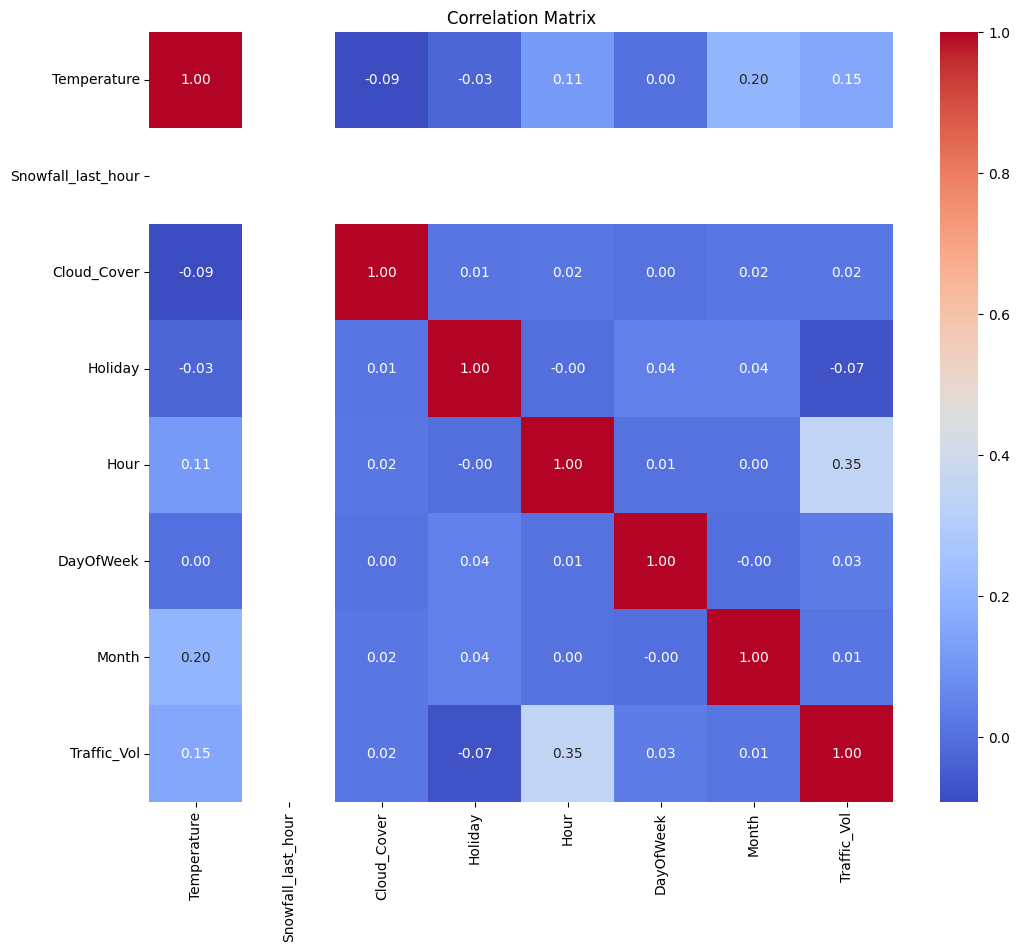

In [12]:
# Examine correlations
plt.figure(figsize=(12, 10))
corr = data1[['Temperature', 'Snowfall_last_hour', 'Cloud_Cover', 'Holiday', 
              'Hour', 'DayOfWeek', 'Month', 'Traffic_Vol']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Feature selection
# Select numerical features and the engineered features
features = ['Temperature', 'Snowfall_last_hour', 'Cloud_Cover', 'Holiday',
           'Hour_sin', 'Hour_cos', 'DayOfWeek_sin', 'DayOfWeek_cos',
           'Month_sin', 'Month_cos']

# Add weather encoded columns
features.extend([col for col in data1.columns if col.startswith('Weather_')])

X = data1[features]
y = data1['Traffic_Vol']

# Check for any missing values in features
print("\nMissing values in features:")
print(X.isnull().sum())


Missing values in features:
Temperature                 0
Snowfall_last_hour          0
Cloud_Cover                 0
Holiday                     0
Hour_sin                    0
Hour_cos                    0
DayOfWeek_sin               0
DayOfWeek_cos               0
Month_sin                   0
Month_cos                   0
Weather_Desc                0
Weather_Clear skies         0
Weather_Cloudy skies        0
Weather_Dense fog           0
Weather_Light fog           0
Weather_Light rain          0
Weather_Rainfall            0
Weather_Snowfall            0
Weather_Stormy weather      0
Weather_Sudden windstorm    0
dtype: int64


In [14]:
# Time-based split for time series data (chronological split)
train_size = int(len(data1) * 0.8)
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 11118 samples
Testing set size: 2780 samples


In [15]:
# Build and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.4f}')

ValueError: could not convert string to float: 'Partly cloudy skies'

In [ ]:
# Feature importance
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
coefficients['Abs_Coefficient'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
# Visualize actual vs predicted values
plt.figure(figsize=(16, 6))
plt.plot(data1['TimeStamp'].iloc[train_size:].values, y_test.values, 'b-', label='Actual')
plt.plot(data1['TimeStamp'].iloc[train_size:].values, y_pred, 'r-', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Plot residuals
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Histogram of residuals
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30)
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

In [ ]:
# Time analysis of residuals to check for patterns
plt.figure(figsize=(16, 6))
plt.plot(data1['TimeStamp'].iloc[train_size:].values, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.title('Residuals Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()